In [1]:
import os
import sys
import numpy as np
import pandas as pd
import requests

#!pip install apimoex
import apimoex

sys.path.append(os.getcwd())
from ops import *
from simulator import Simulator

In [2]:
HISTORY_START_DATE = '2014-07-01'
DATA_DIR = '/home/ezavalnyuk/git/sirius_algo/moex_data'
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)
if not os.path.exists(os.path.join(DATA_DIR,'spot')):
    os.mkdir(os.path.join(DATA_DIR,'spot'))

In [3]:
session = requests.Session()

In [4]:
securities = pd.DataFrame(apimoex.get_board_securities(session))

In [5]:
for ticker in securities.SECID:
    if os.path.exists(os.path.join(DATA_DIR,'spot',f'{ticker}.parquet')):
        continue
    sys.stdout.write(ticker)
    sys.stdout.flush()
    data = apimoex.get_board_candles(session,ticker,10,HISTORY_START_DATE,'2022-11-30')
    if len(data):
        pd.DataFrame(data).set_index('begin').to_parquet(
            os.path.join(DATA_DIR,'spot',f'{ticker}.parquet'),
            engine='pyarrow',compression='brotli'
        )
    sys.stdout.write(' : done\n')
    sys.stdout.flush()

DERZP : done
EM44 : done
HIMC : done
KRKO : done
KSGR : done
KZMS : done
NPOF : done
TRFM : done


In [3]:
sim = Simulator(DATA_DIR)

In [7]:
sim.data['spot'].keys()

dict_keys(['open', 'close', 'high', 'low', 'value'])

In [20]:
close = sim.data['spot']['close'].ffill(limit=6*9*22)
rub_volume = sim.data['spot']['value'].fillna(0)

avg daily tvr           = 710.93%
annualized ret          = 125.89%
ir                      = 0.4138
annualized sharpe ratio = 7.91


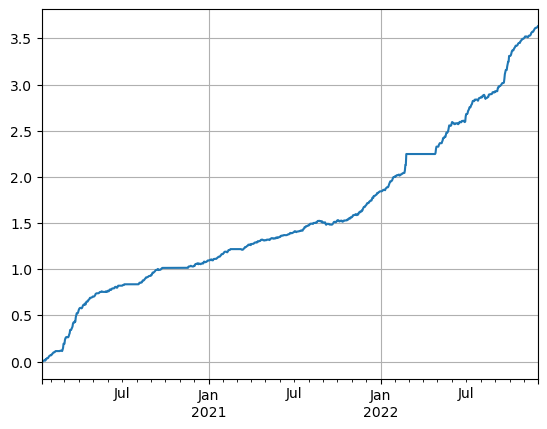

In [9]:
weights = close.rolling(6*9).mean()/close
result = sim.run_weights(weights,universe_size=50,delay=0)
sim.show_result(result)

In [27]:
sim.universe['spot'][50]

KZOS  IGSTP   YNDX   FLOT  BSPBP   NKSH   HMSG   CHMF  \
2014-07-01 10:00:00  False  False  False  False  False  False  False  False   
2014-07-01 10:10:00  False  False  False  False  False  False  False  False   
2014-07-01 10:20:00  False  False  False  False  False  False  False  False   
2014-07-01 10:30:00  False  False  False  False  False  False  False  False   
2014-07-01 10:40:00  False  False  False  False  False  False  False  False   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2022-11-30 18:00:00  False  False   True  False  False  False  False   True   
2022-11-30 18:10:00  False  False   True  False  False  False  False   True   
2022-11-30 18:20:00  False  False   True  False  False  False  False   True   
2022-11-30 18:30:00  False  False   True  False  False  False  False   True   
2022-11-30 18:40:00  False  False   True  False  False  False  False   True   

                     LNZLP   ISKJ  ...   UKUZ   INGR  WTCMP   AKRN   APTK  \
2014-07-01 10:00:00  False  False  ...  False  False  False  False  False   
2014-07-01 10:10:00  False  False  ...  False  False  False  False  False   
2014-07-01 10:20:00  False  False  ...  False  False  False  False  False   
2014-07-01 10:30:00  False  False  ...  False  False  False  False  False   
2014-07-01 10:40:00  False  False  ...  False  False  False  False  False   
...                    ...    ...  ...    ...    ...    ...    ...    ...   
2022-11-30 18:00:00  False  False  ...  False  False  False  False  False   
2022-11-30 18:10:00  False  False  ...  False  False  False  False  False   
2022-11-30 18:20:00  False  False  ...  False  False  False  False  False   
2022-11-30 18:30:00  False  False  ...  False  False  False  False  False   
2022-11-30 18:40:00  False  False  ...  False  False  False  False  False   

                      RUSI   AFKS  VRSBP   MTLR   OKEY  
2014-07-01 10:00:00  False  False  False  False  False  
2014-07-01 10:10:00  False  False  False  False  False  
2014-07-01 10:20:00  False  False  False  False  False  
2014-07-01 10:30:00  False  False  False  False  False  
2014-07-01 10:40:00  False  False  False  False  False  
...                    ...    ...    ...    ...    ...  
2022-11-30 18:00:00  False   True  False   True  False  
2022-11-30 18:10:00  False   True  False   True  False  
2022-11-30 18:20:00  False   True  False   True  False  
2022-11-30 18:30:00  False   True  False   True  False  
2022-11-30 18:40:00  False   True  False   True  False  

[111285 rows x 254 columns]

avg daily tvr           = 2851.72%
annualized ret          = 31.87%
ir                      = 0.1798
annualized sharpe ratio = 3.44


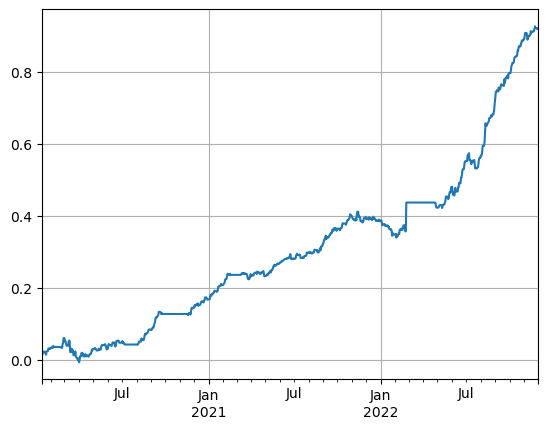

In [26]:
weights = rub_volume/rub_volume.rolling(6*9*5).mean()
result = sim.run_weights(weights,universe_size=50,delay=0)
sim.show_result(result)

avg daily tvr           = 2927.53%
annualized ret          = 30.22%
ir                      = 0.1799
annualized sharpe ratio = 3.44


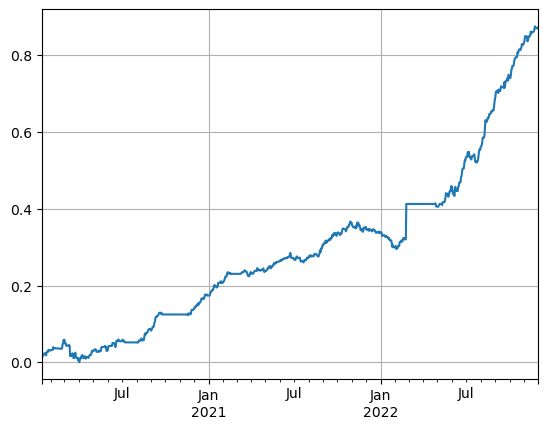

In [19]:
weights = ts_rank(rub_volume,6*9*5)
result = sim.run_weights(weights,universe_size=50,delay=0)
sim.show_result(result)